<a href="https://colab.research.google.com/github/mubasshar009/ML_DL_Model/blob/master/Mnist_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop,Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

# 1. Download dataset


In [101]:
from keras.datasets import mnist
(TrainImages,TrainLabels),(TestImages,TestLabels) = mnist.load_data()

# 2.Check the size and plot the images

In [51]:
print(f"Size Of Train Images: {TrainImages.shape}")
print(f"Size Of Test Images: {TestImages.shape}")
print(f"Size Of Train Labels: {TrainLabels.shape}")
print(f"Size Of Test Labels: {TestLabels.shape}")


Size Of Train Images: (60000, 28, 28)
Size Of Test Images: (10000, 28, 28)
Size Of Train Labels: (60000,)
Size Of Test Labels: (10000,)


Label :1


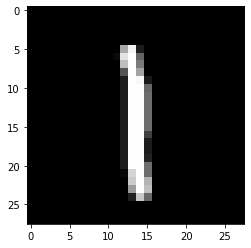

In [52]:
import matplotlib.pyplot as plt
image = TrainImages[14]
label = TrainLabels[14]
print(f"Label :{label}")
plt.imshow(image,cmap = 'gray')
plt.show()

# 3. Apply one hot encoding, float conversion and normalization

In [80]:
TrainImages = TrainImages.reshape((60000,28*28))
TrainImages = TrainImages.astype('float32') / 255
TestImages = TestImages.reshape((10000,28*28))
TestImages = TestImages.astype('float32') / 255


TrainLabels = to_categorical(TrainLabels)
TestLabels = to_categorical(TestLabels)


# 4.Define your CNN architecture

In [54]:
small_network = Sequential()
small_network.add(Dense(16,activation = 'relu',input_shape = (28 * 28,)))
small_network.add(Dense(32,activation = 'relu'))
small_network.add(Dense(64,activation = 'relu'))
small_network.add(Dense(10,activation = 'softmax'))
small_network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 15,866
Trainable params: 15,866
Non-trainable params: 0
_________________________________________________________________


# Compilation

In [55]:
small_network.compile(
    optimizer = 'rmsprop',
    loss = categorical_crossentropy,
    metrics = ['acc']
)

# Training

In [56]:
small_network.fit(TrainImages,TrainLabels,batch_size=64,epochs = 10)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.7233 - acc: 0.7906
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2471 - acc: 0.9273
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2065 - acc: 0.9393
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1690 - acc: 0.9488
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1557 - acc: 0.9526
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1384 - acc: 0.9579
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1289 - acc: 0.9602
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1240 - acc: 0.9633
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1131 - acc: 0.9666
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1095 - acc: 0.9664


# Model_2

In [57]:
large_Dense_network = Sequential()
large_Dense_network.add(Dense(128,activation = 'relu',input_shape = (60000,28*28)))
large_Dense_network.add(Dense(256,activation = 'relu'))
large_Dense_network.add(Dense(512,activation = 'relu'))
large_Dense_network.add(Dense(1024,activation = 'relu'))
large_Dense_network.add(Dense(10,activation = 'softmax'))
large_Dense_network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 60000, 128)        100480    
_________________________________________________________________
dense_23 (Dense)             (None, 60000, 256)        33024     
_________________________________________________________________
dense_24 (Dense)             (None, 60000, 512)        131584    
_________________________________________________________________
dense_25 (Dense)             (None, 60000, 1024)       525312    
_________________________________________________________________
dense_26 (Dense)             (None, 60000, 10)         10250     
Total params: 800,650
Trainable params: 800,650
Non-trainable params: 0
_________________________________________________________________


# Compilation For Large Dense Network


In [64]:
large_Dense_network.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr = 1e-4),metrics=['acc'])

In [65]:
# Training
large_Dense_network.fit(TrainImages,TrainLabels,batch_size=64,epochs = 10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7676 - acc: 0.8000
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2076 - acc: 0.9381
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1474 - acc: 0.9566
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1137 - acc: 0.9663
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0947 - acc: 0.9715
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0761 - acc: 0.9770
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0658 - acc: 0.9801
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0554 - acc: 0.9833
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0454 - acc: 0.9862
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0393 - acc: 0.9880


# Model_03 CNN

In [102]:
CNN = Sequential()
CNN.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
CNN.add(MaxPooling2D((2,2)))
CNN.add(Conv2D(64,(3,3),activation='relu'))
CNN.add(MaxPooling2D((2,2)))
CNN.add(Conv2D(128,(3,3),activation='relu'))
CNN.add(MaxPooling2D((2,2)))
CNN.add(Flatten())
CNN.add(Dense(512,activation = 'relu'))
CNN.add(Dense(10,activation = 'softmax'))
CNN.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)             

In [103]:
TrainImages = TrainImages.reshape((60000,28,28,1))
TrainImages = TrainImages.astype('float32') / 255
TestImages = TestImages.reshape((10000,28,28,1))
TestImages = TestImages.astype('float32') / 255


TrainLabels = to_categorical(TrainLabels)
TestLabels = to_categorical(TestLabels)


#Compilation of CNN Model

In [104]:
CNN.compile(loss = 'categorical_crossentropy',optimizer=RMSprop(lr = 1e-4),metrics=['acc'])


# Training CNN

In [105]:
CNN.fit(TrainImages,TrainLabels,batch_size=64,epochs = 18)

Epoch 1/18
938/938 [==============================] - 5s 4ms/step - loss: 1.2532 - acc: 0.6731
Epoch 2/18
938/938 [==============================] - 4s 4ms/step - loss: 0.2346 - acc: 0.9292
Epoch 3/18
938/938 [==============================] - 4s 4ms/step - loss: 0.1612 - acc: 0.9511
Epoch 4/18
938/938 [==============================] - 4s 4ms/step - loss: 0.1272 - acc: 0.9606
Epoch 5/18
938/938 [==============================] - 4s 5ms/step - loss: 0.1068 - acc: 0.9672
Epoch 6/18
938/938 [==============================] - 4s 4ms/step - loss: 0.0921 - acc: 0.9723
Epoch 7/18
938/938 [==============================] - 4s 4ms/step - loss: 0.0814 - acc: 0.9763
Epoch 8/18
938/938 [==============================] - 4s 4ms/step - loss: 0.0702 - acc: 0.9780
Epoch 9/18
938/938 [==============================] - 4s 4ms/step - loss: 0.0645 - acc: 0.9803
Epoch 10/18
938/938 [==============================] - 4s 4ms/step - loss: 0.0628 - acc: 0.9815
Epoch 11/18
938/938 [============================

# Evaluation:

In [109]:
Test_Loss,Test_acc = CNN.evaluate(TestImages,TestLabels)
print("Test_ACc :" , np.round(Test_acc * 100), "%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0556 - acc: 0.9835
Test_ACc : 98.0 %


# Prediction

In [110]:
import numpy as np
Predict = CNN.predict(TestImages)[10]
print(f"{np.argmax(Predict)}")

0


In [111]:
from tensorflow.keras.datasets import mnist
(TrainImages,TrainLabels),(TestImages,TestLabels) = mnist.load_data()

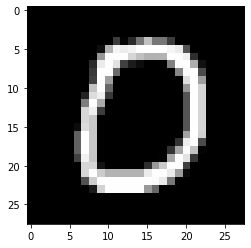

In [112]:
plt.imshow(TestImages[10],cmap = 'gray')